In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Tweet_data.csv')
df = df.drop('Unnamed: 0', axis=1)

In [3]:
df.head(3)

,tweet,sentiment
0,this is disgusting #grandmother #grandsons #...,Negative
1,my all time favorite princess outfit ððð...,Positive
2,#fridayfeeling in the winery today with a fu...,Positive


In [4]:
df.shape

(22735, 2)

C:\Users\bapan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


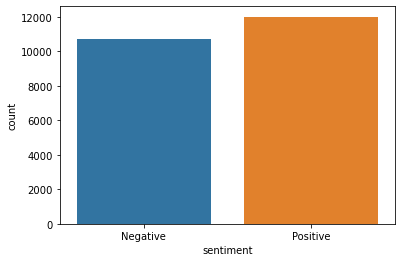

In [5]:
sns.countplot(df['sentiment'])
plt.show()

In [6]:
data = df.copy()

In [7]:
data['sentiment'].replace({'Negative':0, 'Positive':1}, inplace=True)

In [8]:
data.head(3)

,tweet,sentiment
0,this is disgusting #grandmother #grandsons #...,0
1,my all time favorite princess outfit ððð...,1
2,#fridayfeeling in the winery today with a fu...,1


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = data['tweet']
y = data['sentiment']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, test_size=0.12, random_state=10)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20006,), (2729,), (20006,), (2729,))

In [13]:
X_train.values

array(['RT @RWSurferGirl: It is very disappointing that Fox News is not conducting a "Fair &amp; Balanced" Debate. 🇺🇸 #GOPDebate  #GOPDebates',
       "RT @ShannonSanford9: Undoubtedly @FoxNews doesn't want @TedCruz to have any questions. #SMH #GOPDebate",
       "#GOPDebate Can't help but think of Smith from the Matrix- they're multiplying!!",
       ...,
       '@user vets are heroes.and we love them so dearly.vets gave us freedom.they fought for all of us. badly treated by many govts  ',
       '#GOPDebates you need to stop the he-said she-said questions',
       '3 days to be precise ð\x9f\x99\x8cð\x9f\x8f½ #galway #salthill   #getaway #cantwait #boyfrend @ galway, ireland '],
      dtype=object)

In [14]:
y_train = np.array(y_train.values)

In [15]:
y_test = np.array(y_test.values)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20006,), (2729,), (20006,), (2729,))

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
vocab_size = 35000
embedding_dim = 64
max_length = 128
trunc_type='post'
oov_tok = "<OOV>"

In [19]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X_train)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [20]:
padded.shape, testing_padded.shape

((20006, 128), (2729, 128))

In [21]:
# tokenizer = Tokenizer(oov_token="<OOV>")
# tokenizer.fit_on_texts(X_train)

In [22]:
# word_index = tokenizer.word_index
# print(len(word_index))
# #print(word_index)
# sequences = tokenizer.texts_to_sequences(X_train)
# X_train_padded = pad_sequences(sequences, padding='post')
# print(X_train_padded[0])
# print(X_train_padded.shape)

In [23]:
# test_seq = tokenizer.texts_to_sequences(X_test)
# #print("\nTest Sequence = ", test_seq)

# X_test_padded = pad_sequences(test_seq, padding='post', maxlen=35)
# print("\nPadded Test Sequence: ")
# print(X_test_padded)
# print(X_test_padded.shape)

In [24]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten,GlobalAveragePooling1D
import tensorflow as tf

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.summary()


In [26]:
# vocabsize = len(word_index)
# embed_dim = 32
# lstm_out = 196
# model = Sequential()
# model.add(Embedding(vocabsize, embed_dim, input_length = X_train_padded.shape[1]))
# model.add(Flatten())
# model.add(Dense(6, activation='relu'))
# #model.add(SpatialDropout1D(0.4))
# #model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout = 0.2))
# #model.add(LSTM(lstm_out, dropout=0.2)) #, recurrent_dropout = 0.2))
# model.add(Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 64)           2240000   
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 2,240,397
Trainable params: 2,240,397
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='binary_crossentropy', 
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['acc'])

In [29]:
#num_epochs = 10
model.fit(padded, y_train, epochs=5, validation_data=(testing_padded, y_test))

Epoch 1/5
626/626 [==============================] - 21s 33ms/step - loss: 0.5373 - acc: 0.7563 - val_loss: 0.2946 - val_acc: 0.9003
Epoch 2/5
626/626 [==============================] - 18s 29ms/step - loss: 0.2131 - acc: 0.9244 - val_loss: 0.1702 - val_acc: 0.9337
Epoch 3/5
626/626 [==============================] - 19s 30ms/step - loss: 0.1343 - acc: 0.9504 - val_loss: 0.1303 - val_acc: 0.9472
Epoch 4/5
626/626 [==============================] - 19s 30ms/step - loss: 0.0946 - acc: 0.9663 - val_loss: 0.1123 - val_acc: 0.9560
Epoch 5/5
626/626 [==============================] - 19s 31ms/step - loss: 0.0700 - acc: 0.9767 - val_loss: 0.1048 - val_acc: 0.9575


In [42]:
e = model.layers[0]
Embedding_Vec = e.get_weights()[0]
print(Embedding_Vec.shape) # shape: (vocab_size, embedding_dim)

(35000, 32)


In [43]:
Embedding_Vec

array([[ 0.02196405, -0.04592029,  0.01728762, ...,  0.03014616,
        -0.0284972 , -0.03658047],
       [ 0.00840681,  0.03893738, -0.04448705, ..., -0.00744383,
        -0.04326754, -0.02969633],
       [-0.01479891,  0.1526739 ,  0.04896675, ...,  0.02771724,
         0.00877178,  0.00033776],
       ...,
       [ 0.01147521, -0.02343711, -0.01083366, ...,  0.03053726,
         0.0378308 , -0.00421417],
       [ 0.02341456,  0.03305327,  0.03299357, ...,  0.03495561,
        -0.04480996, -0.02447081],
       [ 0.01921323,  0.04015834, -0.01038395, ..., -0.0173543 ,
        -0.01277492, -0.00508275]], dtype=float32)

In [44]:
t = ['Only fanatical crowd is easily controllable',
     
     '''Modi talked about Swiss money but did nothing.
       Internally also he only harassed people with what chidambaram called demonization, 
       making the poor and middle class suffer for nothing''',
     
    '''We are secular not because the word was added in our constitition.
           Secularism is in our blood''',
     
    '''This is horrible...we need super gundai to kill gundai...she is like an unleashed monster,
           to tame her Modi Ji please show your Virat roop from early 2000s..''']
t

['Only fanatical crowd is easily controllable',
 'Modi talked about Swiss money but did nothing.\n       Internally also he only harassed people with what chidambaram called demonization, \n       making the poor and middle class suffer for nothing',
 'We are secular not because the word was added in our constitition.\n           Secularism is in our blood',
 'This is horrible...we need super gundai to kill gundai...she is like an unleashed monster,\n           to tame her Modi Ji please show your Virat roop from early 2000s..']

In [47]:
testing_seq = tokenizer.texts_to_sequences(t)
tes_padded = pad_sequences(testing_seq,maxlen=max_length, padding='post')

In [49]:
tes_padded.shape

(4, 60)

In [50]:
sentiment = model.predict(tes_padded,batch_size=1)

In [54]:
sentiment

array([[0.83120006],
       [0.77305067],
       [0.61389536],
       [0.09158513]], dtype=float32)